### Environment Setup and Imports

In [1]:
import os, sys, glob, json, csv, time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint
from tqdm import tqdm

# Make sure the project root and config module are found.
# If config.py is in the src/ folder, add that to sys.path.
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
src_path = os.path.join(project_root, "src")
if src_path not in sys.path:
    sys.path.insert(0, src_path)

# Import configuration variables.
from config import (
    PROJECT_ROOT, RAW_DIR, PROCESSED_FEATURES_DIR, AUDIO_EXTENSIONS,
    TEMPO_MODEL_FILE, EMB_DISCOGS_MODEL_FILE, EMB_MSD_MODEL_FILE,
    GENRE_MODEL_FILE, VOICE_MODEL_FILE, DANCEABILITY_MODEL_FILE,
    EMOTION_MODEL_FILE, TEMPO_METHOD
)

# Set plotting style
sns.set(style="whitegrid")
%matplotlib inline

print("Project Root:", PROJECT_ROOT)
print("Processed Features Directory:", PROCESSED_FEATURES_DIR)


Project Root: /home/cepatinog/amplab
Processed Features Directory: /home/cepatinog/amplab/data/processed/features


### Load All Processed Features

Each track’s features were saved as a separate JSON file in the data/processed/features/ folder. 
We now load all of them into a DataFrame.


In [2]:
# Find all JSON files in the processed features folder
features_files = glob.glob(os.path.join(PROCESSED_FEATURES_DIR, "*.json"))
print(f"Found {len(features_files)} feature files.")

# Load each JSON file and append to a list.
data = []
for file in tqdm(features_files, desc="Loading feature files"):
    try:
        with open(file, 'r') as f:
            feat = json.load(f)
            data.append(feat)
    except Exception as e:
        print(f"Error loading {file}: {e}")

# Create a DataFrame
df = pd.DataFrame(data)
print("DataFrame shape:", df.shape)
df.head()


Found 2100 feature files.


Loading feature files: 100%|██████████| 2100/2100 [00:04<00:00, 453.70it/s]

DataFrame shape: (2100, 24)


,tempo_global_bpm,tempo_local_bpms,tempo_local_probs,temperley_key,temperley_scale,temperley_strength,krumhansl_key,krumhansl_scale,krumhansl_strength,edma_key,...,loudness_integrated_loudness,loudness_loudness_range,emb_discogs,genre_activations,voice_instrumental,danceability_classifier,emb_msd,arousal_valence,danceability_signal,file
0,186.0,"[186.0, 186.0, 186.0, 93.0]","[0.3003535568714142, 0.23023605346679688, 0.25...",F,major,0.634220,C,major,0.723770,C,...,-7.311245,4.646548,"[-0.015341300517320633, 0.023692727088928223, ...","[6.621483805702155e-08, 2.3261238766281167e-06...","{'predictions': [0.005843253340572119, 0.99415...",{'danceability_classifier': [0.998669624328613...,"[0.8943716287612915, -2.783511161804199, -1.95...","{'valence': 4.255828857421875, 'arousal': 5.80...","{'danceability': 1.0441495180130005, 'dfa': [0...",/home/cepatinog/amplab/data/raw/audio_chunks/a...
1,106.0,"[106.0, 106.0, 106.0, 106.0]","[0.5449942946434021, 0.8026071190834045, 0.908...",G,major,0.605473,E,minor,0.789432,E,...,-12.969042,2.495696,"[0.004451508168131113, -0.022885536774992943, ...","[2.9484910555765964e-05, 0.0001044770106091164...","{'predictions': [0.86649489402771, 0.133505135...",{'danceability_classifier': [0.918759822845459...,"[-1.835135579109192, -4.104931831359863, 1.866...","{'valence': 5.148846626281738, 'arousal': 5.20...","{'danceability': 1.1787617206573486, 'dfa': [0...",/home/cepatinog/amplab/data/raw/audio_chunks/a...
2,120.0,"[120.0, 120.0, 120.0, 120.0]","[0.7274295687675476, 0.685203492641449, 0.7176...",F,minor,0.757263,F,minor,0.879327,F,...,-6.318822,2.643442,"[0.02448534592986107, 0.030716195702552795, 0....","[3.320088580949232e-06, 5.176000195206143e-05,...","{'predictions': [0.27302420139312744, 0.726975...",{'danceability_classifier': [0.830655097961425...,"[-1.6820870637893677, -2.026064157485962, 0.51...","{'valence': 4.7871527671813965, 'arousal': 6.0...","{'danceability': 1.2326278686523438, 'dfa': [1...",/home/cepatinog/amplab/data/raw/audio_chunks/a...
3,75.0,"[75.0, 75.0, 75.0, 100.0]","[0.37563303112983704, 0.46090781688690186, 0.7...",C,minor,0.637705,C,minor,0.759360,C,...,-13.909045,1.861990,"[0.27662113308906555, 0.06800065189599991, -0....","[2.309298530178694e-09, 1.650182990253768e-09,...","{'predictions': [0.0002640756720211357, 0.9997...",{'danceability_classifier': [0.999546349048614...,"[2.1390907764434814, -1.5852763652801514, -1.9...","{'valence': 3.1755707263946533, 'arousal': 4.3...","{'danceability': 1.1683260202407837, 'dfa': [0...",/home/cepatinog/amplab/data/raw/audio_chunks/a...
4,78.0,"[78.0, 149.0, 150.0, 121.0]","[0.060988783836364746, 0.08013267815113068, 0....",A,major,0.862571,E,major,0.816588,C#,...,-11.707583,4.918626,"[0.003101607086136937, 0.01817971095442772, 0....","[1.8874396801038529e-06, 6.967482477193698e-05...","{'predictions': [0.031891949474811554, 0.96810...",{'danceability_classifier': [0.985152602195739...,"[1.8140745162963867, -1.408189296722412, -0.35...","{'valence': 4.250083923339844, 'arousal': 4.08...","{'danceability': 1.1625767946243286, 'dfa': [1...",/home/cepatinog/amplab/data/raw/audio_chunks/a...


### Music Styles Overview

Which music styles are present?
The genre predictions come from the genre_activations field (a list of 400 activation values).
For each track we will use the maximum activation (i.e. argmax) to decide on a single style prediction.
Then, extract the parent broad genre from the predicted style (assuming a tag format "genre—style").
Finally, plot the distribution and save full results to a TSV file.
For this example, we simulate a mapping of indices (0–399) to style tags. In practice, you should load the real mapping (for example, from a TSV file).

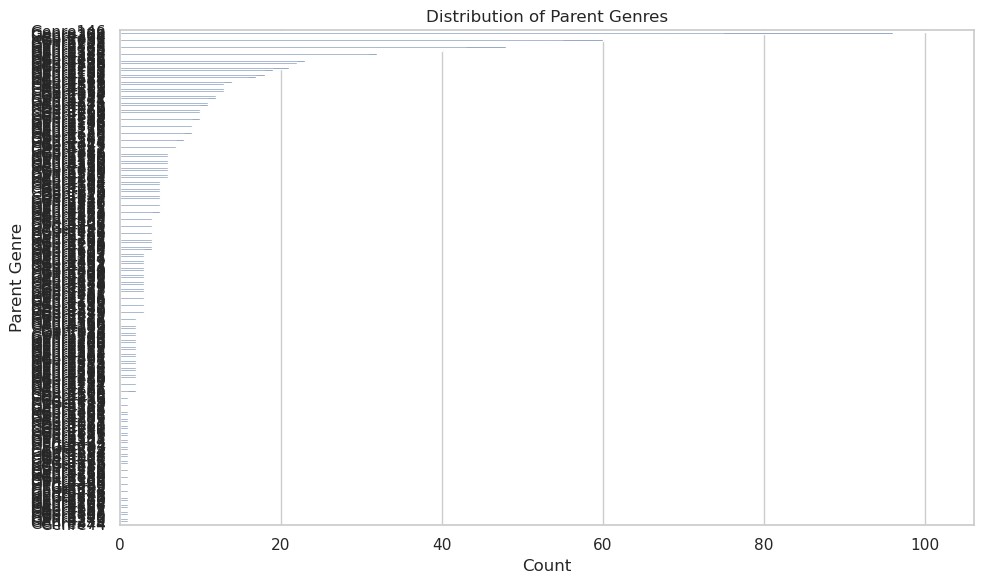

Full genre predictions saved to: /home/cepatinog/amplab/data/processed/features/genre_predictions.tsv


In [3]:
# %% [code]
# Dummy mapping for 400 style labels: in practice, load from a file if available.
genre_labels = [f"Genre{i}—Style{i}" for i in range(400)]

def get_predicted_style(activations, threshold=None):
    """
    Given a list of activation values, return the style label.
    If threshold is provided, you can flag multiple styles;
    here we choose the max activation (single prediction).
    """
    # Single prediction: take the index with maximum activation.
    idx = np.argmax(activations)
    return genre_labels[idx]

# Apply the function to get a new column with predicted style.
df['predicted_genre'] = df['genre_activations'].apply(get_predicted_style)

# Now extract the broad parent genre (everything before the "—").
df['parent_genre'] = df['predicted_genre'].apply(lambda x: x.split("—")[0])

# Plot the distribution of parent genres.
plt.figure(figsize=(10,6))
sns.countplot(y="parent_genre", data=df, order=df['parent_genre'].value_counts().index)
plt.title("Distribution of Parent Genres")
plt.xlabel("Count")
plt.ylabel("Parent Genre")
plt.tight_layout()
plt.show()

# Save the full per-track genre predictions to a TSV file.
genre_tsv = os.path.join(PROCESSED_FEATURES_DIR, "genre_predictions.tsv")
df[['file', 'predicted_genre', 'parent_genre']].to_csv(genre_tsv, sep="\t", index=False)
print("Full genre predictions saved to:", genre_tsv)


### Tempo and Danceability Distribution
We now plot the distribution of tempo and danceability. (For danceability, we use the signal-based measure stored under "danceability_signal".

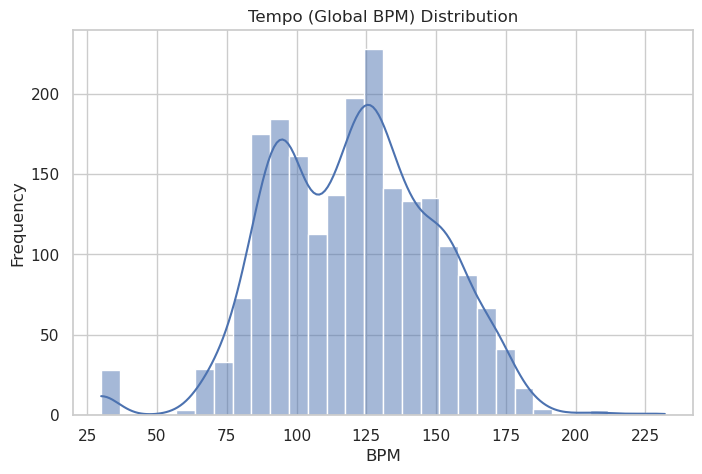

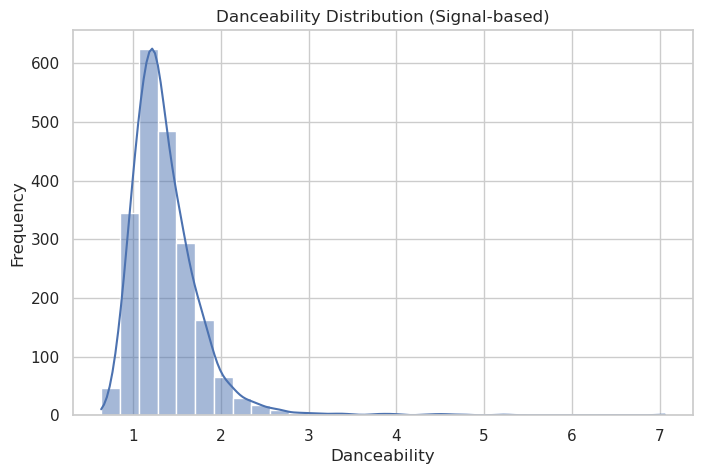

In [4]:
# Tempo: global BPM
plt.figure(figsize=(8,5))
sns.histplot(df['tempo_global_bpm'].dropna(), bins=30, kde=True)
plt.title("Tempo (Global BPM) Distribution")
plt.xlabel("BPM")
plt.ylabel("Frequency")
plt.show()

# Danceability: extract the numeric value from "danceability_signal" (a dict)
df['danceability'] = df['danceability_signal'].apply(lambda x: x.get("danceability") if isinstance(x, dict) else np.nan)

plt.figure(figsize=(8,5))
sns.histplot(df['danceability'].dropna(), bins=30, kde=True)
plt.title("Danceability Distribution (Signal-based)")
plt.xlabel("Danceability")
plt.ylabel("Frequency")
plt.show()


## Keys and Scales
We have key estimates from three profiles: "temperley_key", "krumhansl_key", and "edma_key" (and similarly for scales). We plot the distributions and also compute the percentage of tracks where all three agree.

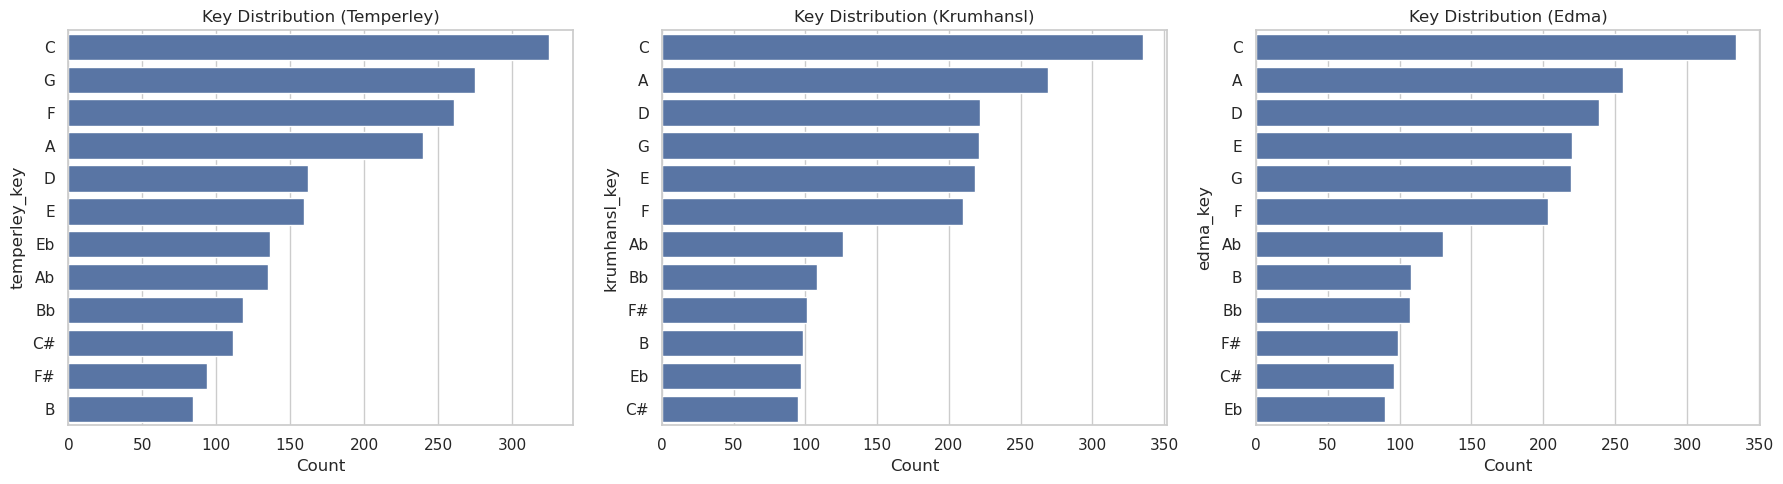

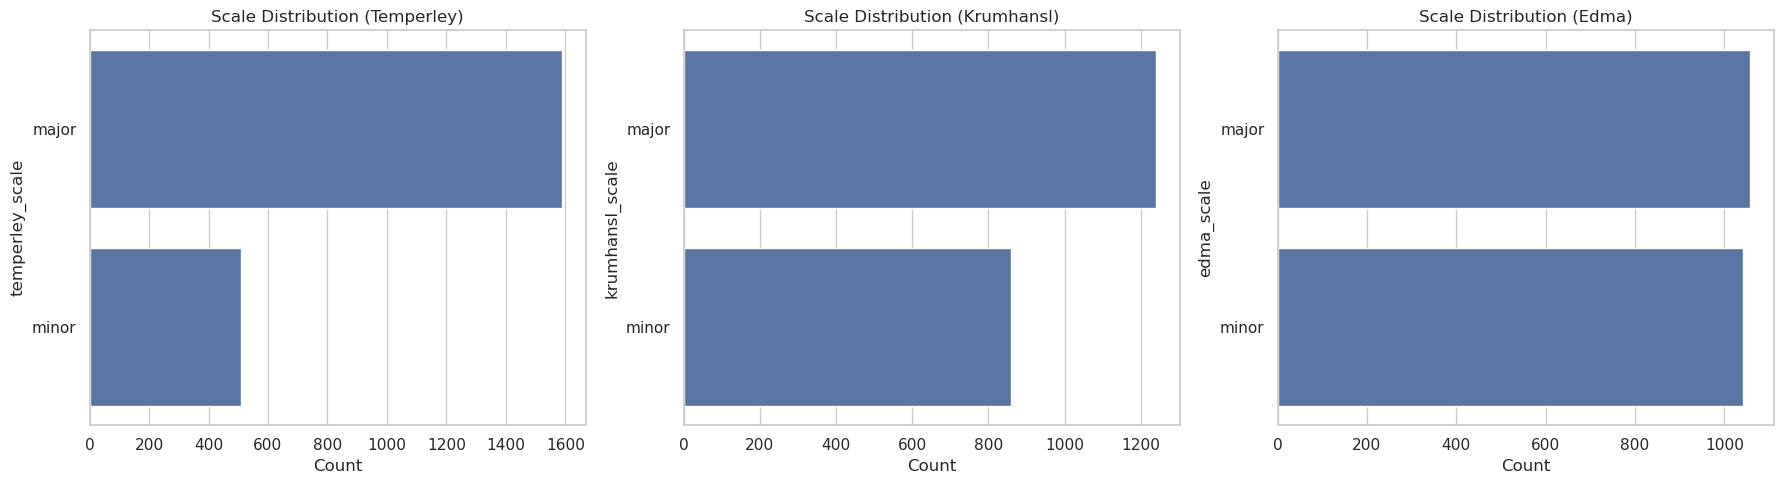

Percentage of tracks where all three key estimations agree: 53.19%


In [5]:
profiles = ['temperley', 'krumhansl', 'edma']
key_cols = [f"{p}_key" for p in profiles]
scale_cols = [f"{p}_scale" for p in profiles]

# Plot key distribution for each profile.
fig, axes = plt.subplots(1, 3, figsize=(18,5))
for ax, col in zip(axes, key_cols):
    sns.countplot(y=col, data=df, order=df[col].value_counts().index, ax=ax)
    ax.set_title(f"Key Distribution ({col.split('_')[0].capitalize()})")
    ax.set_xlabel("Count")
plt.tight_layout()
plt.show()

# Plot scale distribution for each profile.
fig, axes = plt.subplots(1, 3, figsize=(18,5))
for ax, col in zip(axes, scale_cols):
    sns.countplot(y=col, data=df, order=df[col].value_counts().index, ax=ax)
    ax.set_title(f"Scale Distribution ({col.split('_')[0].capitalize()})")
    ax.set_xlabel("Count")
plt.tight_layout()
plt.show()

# Calculate % of tracks where all three key estimations agree.
def all_keys_agree(row):
    return len(set(row[key_cols])) == 1

df['keys_agree'] = df.apply(all_keys_agree, axis=1)
agreement_percent = df['keys_agree'].mean() * 100
print(f"Percentage of tracks where all three key estimations agree: {agreement_percent:.2f}%")


### Loudness Distribution
We plot the integrated loudness (in LUFS).

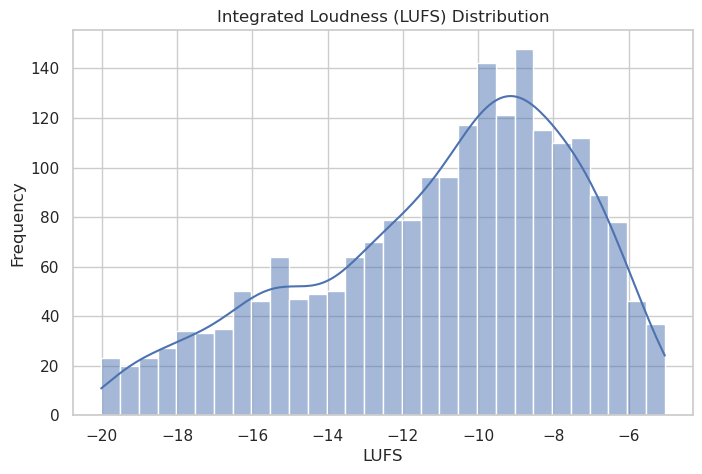

In [6]:
# %% [code]
plt.figure(figsize=(8,5))
sns.histplot(df['loudness_integrated_loudness'].dropna(), bins=30, kde=True)
plt.title("Integrated Loudness (LUFS) Distribution")
plt.xlabel("LUFS")
plt.ylabel("Frequency")
plt.show()


### Arousal/Valence Emotion Space
We extract the arousal and valence values from the "arousal_valence" dictionary and create a 2D scatter plot.

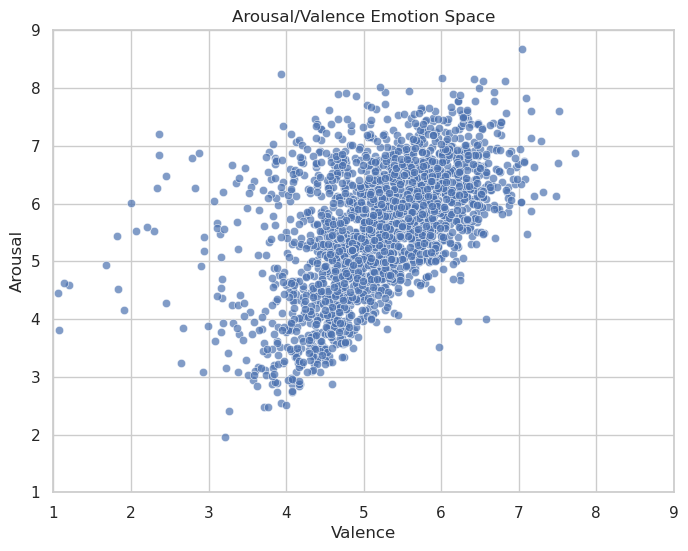

In [8]:
# Create separate columns for arousal and valence.
df['valence'] = df['arousal_valence'].apply(lambda x: x.get("valence") if isinstance(x, dict) else np.nan)
df['arousal'] = df['arousal_valence'].apply(lambda x: x.get("arousal") if isinstance(x, dict) else np.nan)

plt.figure(figsize=(8,6))
sns.scatterplot(x='valence', y='arousal', data=df, alpha=0.7)
plt.title("Arousal/Valence Emotion Space")
plt.xlabel("Valence")
plt.ylabel("Arousal")
plt.xlim(1,9)
plt.ylim(1,9)
plt.show()


## Vocal vs Instrumental
Count the number of tracks predicted as vocal vs instrumental using the "voice_instrumental" field.

Vocal vs Instrumental counts:
voice_instrumental_class
voice           1499
instrumental     601
Name: count, dtype: int64


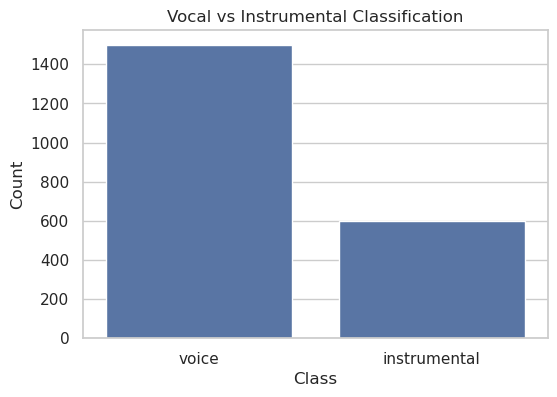

In [ ]:
# Extract predicted class from the voice/instrumental field.
df['voice_instrumental_class'] = df['voice_instrumental'].apply(lambda x: x.get("predicted_class") if isinstance(x, dict) else np.nan)
vi_counts = df['voice_instrumental_class'].value_counts()
print("Vocal vs Instrumental counts:")
print(vi_counts)

plt.figure(figsize=(6,4))
sns.countplot(x='voice_instrumental_class', data=df, order=vi_counts.index)
plt.title("Vocal vs Instrumental Classification")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()
